In [53]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
df = pd.read_csv('results.csv', index_col = 'date')

In [55]:
# created a winner column to more easily identify teams who win and lose 

df = sqldf("""SELECT *,
         CASE 
             WHEN home_score > away_score THEN 1
             WHEN home_score < away_score THEN 2
             ELSE 0
         END as Winner
         FROM df""")

In [56]:
# finding the largest scoreline ever

sqldf("""SELECT *
         FROM df
         WHERE (home_score + away_score) = (SELECT MAX(home_score + away_score)
                                             FROM df)""")

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
0,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,0,1


In [57]:
# creating a new row just showing the winning team or if it was a draw

df = sqldf("""SELECT *,
         CASE 
             WHEN Winner = 1 THEN home_team 
             WHEN WInner = 2 THEN away_team
             WHEN Winner = 0 THEN 'Draw'
         END as winning_team
         FROM df""")

In [67]:
# finding the winningest teams in history

top_teams = sqldf("""SELECT winning_team, COUNT(*) wins
         FROM df
         WHERE winning_team != 'Draw'
         GROUP BY winning_team
         ORDER BY wins desc 
         LIMIT 10""")

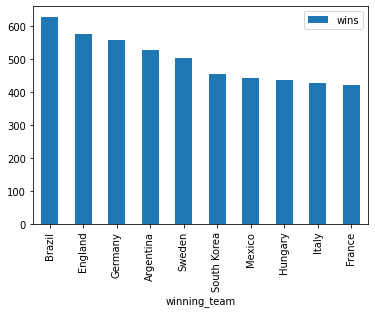

In [69]:
top_teams.plot.bar(x = 'winning_team')